### EDA for NFL and NBA Fantasy Stats
* The NFL database that I scraped already had the Fantasy points calculated, so the goal will be to find the population mean, and the sample means for each year. Probably will break down each year by position as well to get a more general idea
* The NBA database did not have Fantasy points already calculated, so I will be creating a column that does the calculations for me and will likely analyze the data in a similar process to the NFL data. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

### Reading in NFL and NBA CSVs

In [47]:
nfl = pd.read_csv('data/nfl/Master_NFL.csv', index_col= 'Unnamed: 0')
nba = pd.read_csv('data/nba/Master_NBA.csv', index_col= 'Unnamed: 0')
print(nfl.head())
print(nba.head())
#cleaning nfl player column
nfl['Player'] = nfl['Player'].apply(lambda x: x.replace('*', '').replace('+', '').strip())

2PM  2PP   Age  Att  Att.1  Cmp   DKPt   FDPt   FL FantPos  ...  TD.3  Tgt  \
0  0.0  0.0  23.0  0.0  263.0  0.0  274.9  242.4  0.0      RB  ...  12.0  0.0   
1  0.0  0.0  26.0  0.0    4.0  0.0  255.3  215.8  0.0      WR  ...  13.0  0.0   
2  0.0  0.0  23.0  0.0    0.0  0.0  238.0  208.5  0.0      WR  ...  12.0  0.0   
3  0.0  0.0  26.0  0.0    4.0  0.0  220.3  195.3  0.0      WR  ...  12.0  0.0   
4  0.0  0.0  28.0  0.0  206.0  0.0  249.2  226.2  0.0      RB  ...  13.0  0.0   

    Tm    VBD   Y/A    Y/R  Yds   Yds.1   Yds.2  Year  
0  NYG  136.0  3.90  10.15  0.0  1027.0   487.0  1970  
1  CHI  134.0  4.25  14.45  0.0    17.0  1026.0  1970  
2  SFO  134.0  0.00  20.75  0.0     0.0  1100.0  1970  
3  SDG  124.0  1.75  22.86  0.0     7.0  1006.0  1970  
4  STL  123.0  4.74  11.41  0.0   977.0   365.0  1970  

[5 rows x 32 columns]
                Player Pos   Age   Tm     G   GS      MP     FG     FGA  \
0      Zaid Abdul-Aziz   C  30.0  BUF  22.0  0.0   195.0   25.0    74.0   
1  Kare

### Creating NBA Fantasy Points Column

In [6]:
nba.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

In [34]:
nba['FantPt'] = (nba['PTS'] + nba['TRB']*1.2 + nba['AST']*1.5 + nba['STL']*3 + nba['BLK']*3 - nba['TOV'])
nba['FPPG'] = (nba['PTS'] + nba['TRB']*1.2 + nba['AST']*1.5 + nba['STL']*3 + nba['BLK']*3 - nba['TOV'])/ nba['G']
#checking to make sure formula works- checking against NBA.com fantasy site. Looks like our numbers are close, difference is probably accounted for in the rounding
#also this is a total column, I will probably want to make a per game column as well. 
nba[nba.Player == 'Stephen Curry'][['FantPt', 'FPPG', 'Year']]

,FantPt,FPPG,Year
12684,2804.2,35.052500,2010
13128,2525.2,34.124324,2011
13580,771.6,29.676923,2012
14053,3145.3,40.324359,2013
14534,3404.8,43.651282,2014
15015,3525.7,44.071250,2015
15500,3971.5,50.272152,2016
15969,3446.6,43.627848,2017
16477,2235.2,43.827451,2018
17021,3024.3,43.830435,2019


In [55]:
nba.sort_values('G', ascending = False).head(15)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
118,Tom Henderson,PG,25.0,TOT,87.0,0.0,2791.0,371.0,826.0,0.449,...,43.0,196.0,239.0,598.0,138.0,17.0,0.0,148.0,975.0,1977
8265,Chris Gatling,PF,32.0,TOT,85.0,0.0,1811.0,365.0,802.0,0.455,...,154.0,348.0,502.0,71.0,82.0,23.0,169.0,246.0,1014.0,2000
10206,Theo Ratliff,C,30.0,TOT,85.0,83.0,2664.0,266.0,549.0,0.485,...,195.0,419.0,614.0,71.0,54.0,307.0,120.0,300.0,672.0,2004
9870,Shareef Abdur-Rahim,PF,27.0,TOT,85.0,56.0,2684.0,501.0,1054.0,0.475,...,189.0,450.0,639.0,174.0,68.0,37.0,184.0,222.0,1384.0,2004
1381,Dave Robisch,C,31.0,TOT,84.0,0.0,2116.0,330.0,740.0,0.446,...,157.0,342.0,499.0,173.0,37.0,34.0,83.0,173.0,860.0,1981
1642,Mike Mitchell,SF,26.0,TOT,84.0,83.0,3063.0,753.0,1477.0,0.510,...,244.0,346.0,590.0,82.0,60.0,43.0,153.0,277.0,1726.0,1982
1059,Billy Paultz,C,31.0,TOT,84.0,0.0,2193.0,327.0,673.0,0.486,...,187.0,399.0,586.0,188.0,69.0,84.0,115.0,213.0,763.0,1980
1331,Billy McKinney,PG,25.0,TOT,84.0,0.0,2166.0,327.0,645.0,0.507,...,36.0,148.0,184.0,360.0,99.0,11.0,158.0,231.0,818.0,1981
4812,Thurl Bailey,PF,30.0,TOT,84.0,18.0,2104.0,368.0,836.0,0.440,...,122.0,363.0,485.0,78.0,35.0,117.0,108.0,160.0,951.0,1992
3398,Tyrone Corbin,SF,25.0,TOT,84.0,5.0,1739.0,257.0,525.0,0.490,...,127.0,223.0,350.0,115.0,72.0,18.0,104.0,181.0,625.0,1988


(array([2.108e+03, 1.137e+03, 8.970e+02, 8.050e+02, 7.460e+02, 6.680e+02,
        6.670e+02, 6.490e+02, 6.210e+02, 6.440e+02, 6.160e+02, 5.810e+02,
        5.770e+02, 5.800e+02, 5.090e+02, 5.110e+02, 4.640e+02, 4.470e+02,
        4.560e+02, 3.870e+02, 3.980e+02, 3.570e+02, 3.230e+02, 3.100e+02,
        2.700e+02, 2.690e+02, 2.170e+02, 1.770e+02, 1.600e+02, 1.500e+02,
        1.360e+02, 1.110e+02, 8.200e+01, 8.400e+01, 6.300e+01, 4.400e+01,
        4.100e+01, 3.300e+01, 3.000e+01, 2.600e+01, 1.700e+01, 1.900e+01,
        1.000e+01, 6.000e+00, 4.000e+00, 7.000e+00, 4.000e+00, 2.000e+00,
        3.000e+00, 5.000e+00]),
 array([-2.000000e+00,  9.948200e+01,  2.009640e+02,  3.024460e+02,
         4.039280e+02,  5.054100e+02,  6.068920e+02,  7.083740e+02,
         8.098560e+02,  9.113380e+02,  1.012820e+03,  1.114302e+03,
         1.215784e+03,  1.317266e+03,  1.418748e+03,  1.520230e+03,
         1.621712e+03,  1.723194e+03,  1.824676e+03,  1.926158e+03,
         2.027640e+03,  2.129122e+03

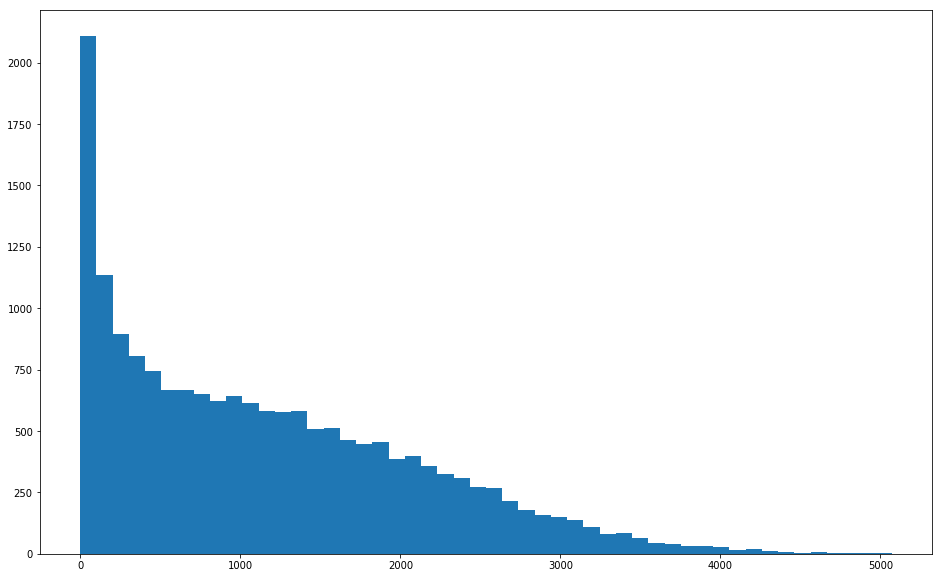

In [36]:
fig, ax = plt.subplots(figsize= (16,10))
ax.hist(nba.FantPt, bins = 50)
#need to figure out what kind of distrubtion this is

### Just for fun, I want to graph a career archetype in relation to FP production by years in the league for each position. 

In [66]:
nfl.columns 
nfl.FantPos.value_counts()

RB    7767
WR    7641
TE    4053
QB    3683
?     2983
Name: FantPos, dtype: int64

In [67]:
#will need to go check their positions 
players_w_fp_nopos = nfl[nfl.FantPos == '?'][['Player', 'FantPos', 'Tm', 'G', 'GS', 'FantPt', 'Year']].sort_values('FantPt', ascending = False).head(14)
players_w_fp_nopos.iloc[0,1] = 'RB'
players_w_fp_nopos

,Player,FantPos,Tm,G,GS,FantPt,Year
17089,Mike Anderson,RB,DEN,15.0,15.0,201.0,2005
19440,Chad Johnson,?,CIN,16.0,15.0,162.0,2009
20089,Chad Johnson,?,CIN,14.0,12.0,107.0,2010
14835,Desmond Clark,?,DEN,16.0,4.0,93.0,2001
18403,Kolby Smith,?,KAN,16.0,6.0,68.0,2007
15646,Terry Jones,?,BAL,14.0,6.0,17.0,2002
14845,Tony Carter,?,DEN,16.0,6.0,9.0,2001
15733,Woodrow Dantzler,?,DAL,5.0,0.0,4.0,2002
16344,Stephen Alexander,?,SDG,3.0,0.0,2.0,2003
7989,Chris Kelley,?,CLE,2.0,0.0,2.0,1987


In [57]:
nfl[nfl.G == 0][['Player', 'Tm', 'Year', 'FantPt']].sort_values('FantPt', ascending = False)

,Player,Tm,Year,FantPt
1114,Barry Pearson,PIT,1972,0.0
22990,Xavier Grimble,2TM,2014,0.0
22994,Andre Hardy,ARI,2014,0.0
22995,Chandler Harnish,MIN,2014,0.0
22996,Chris Harper,NYG,2014,0.0
22998,Travis Harvey,3TM,2014,0.0
22999,Micah Hatfield,SDG,2014,0.0
23000,Matt Hazel,MIA,2014,0.0
23001,Michael Hill,3TM,2014,0.0
23002,Stephen Hill,CAR,2014,0.0


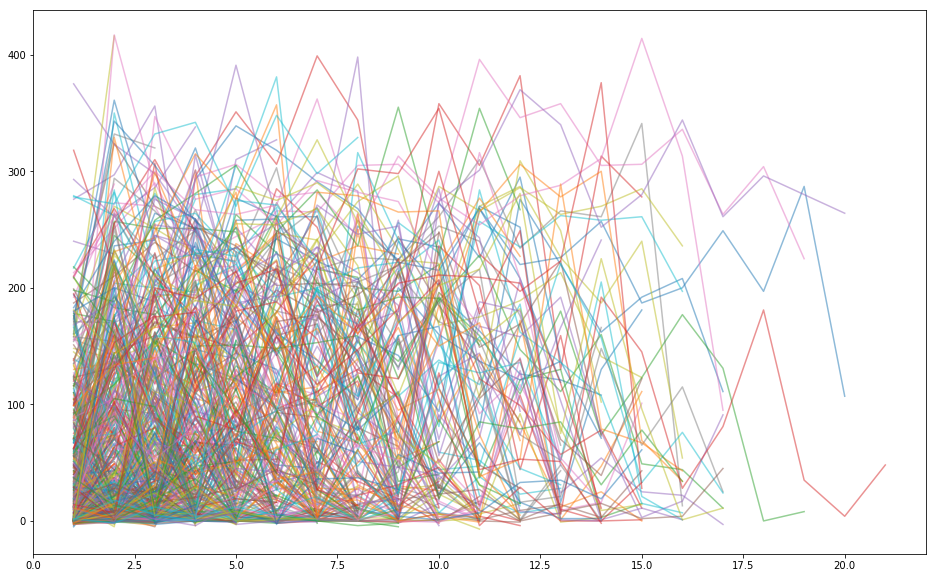

In [93]:
nfl_cleaner = nfl[nfl.G != 0]
qb = nfl_cleaner[nfl_cleaner.FantPos == 'QB']
gb = qb[['Player', 'Year', 'FantPt']].sort_values('Year').groupby(['Player'])
row_data = []
for row in gb:
    row_data.append(row[1]['FantPt'].values)
fig, ax = plt.subplots(figsize= (16,10))
for row in row_data:
    val_lst = []
    idx_lst = []
    for idx, val in enumerate(row):
        val_lst.append(val)
        idx_lst.append(idx + 1)
    ax.plot(idx_lst, val_lst, alpha = 0.5)

# ax.plot(qb['Year'], qb['FantPt'], alpha= 0.5)

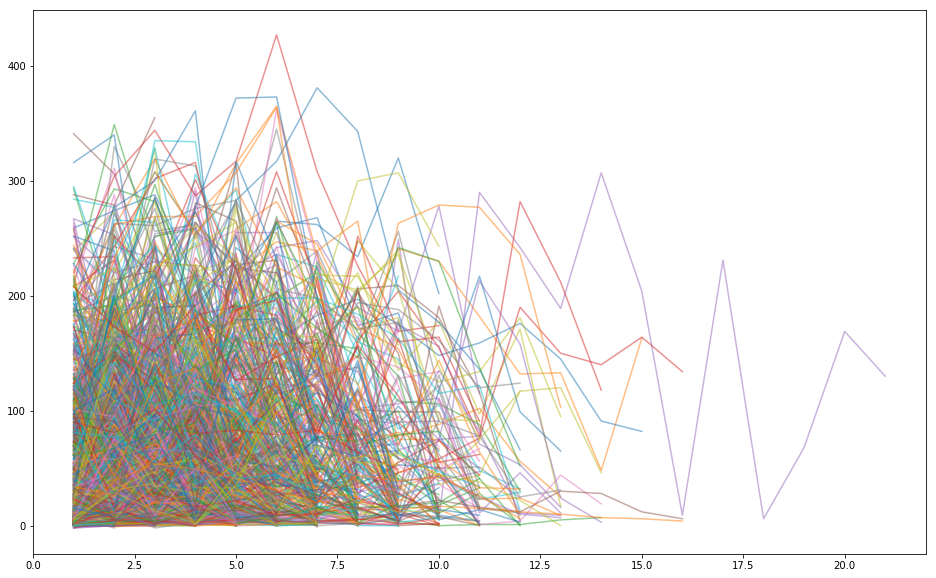

In [94]:
rb = nfl_cleaner[nfl_cleaner.FantPos == 'RB']
gb = rb[['Player', 'Year', 'FantPt']].sort_values('Year').groupby(['Player'])
row_data = []
for row in gb:
    row_data.append(row[1]['FantPt'].values)
fig, ax = plt.subplots(figsize= (16,10))
for row in row_data:
    val_lst = []
    idx_lst = []
    for idx, val in enumerate(row):
        val_lst.append(val)
        idx_lst.append(idx + 1)
    ax.plot(idx_lst, val_lst, alpha = 0.5)

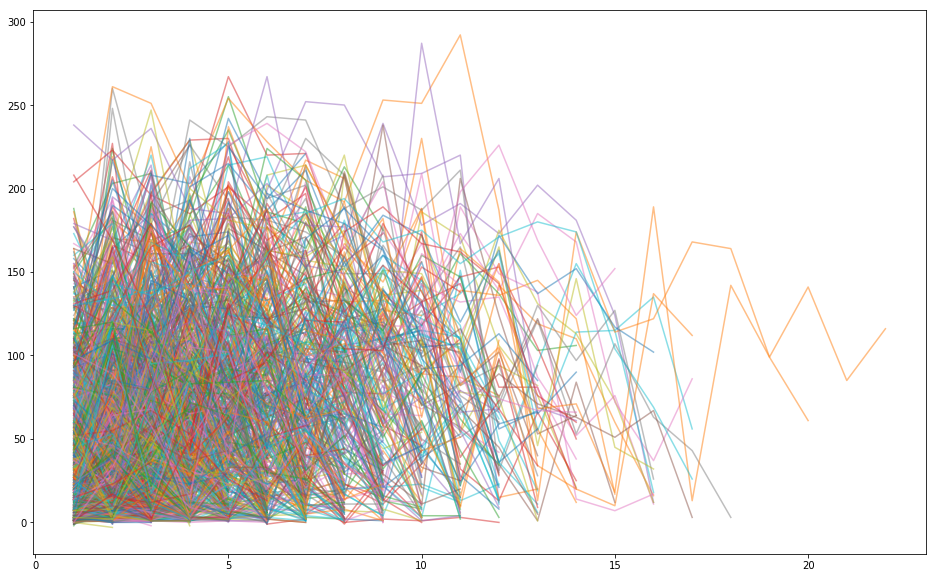

In [95]:
wr = nfl_cleaner[nfl_cleaner.FantPos == 'WR']
gb = wr[['Player', 'Year', 'FantPt']].sort_values('Year').groupby(['Player'])
row_data = []
for row in gb:
    row_data.append(row[1]['FantPt'].values)
fig, ax = plt.subplots(figsize= (16,10))
for row in row_data:
    val_lst = []
    idx_lst = []
    for idx, val in enumerate(row):
        val_lst.append(val)
        idx_lst.append(idx + 1)
    ax.plot(idx_lst, val_lst, alpha = 0.5)